In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^NSEI', start = '2012-03-11',end = '2022-07-10')
data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,5420.100098,5421.899902,5327.299805,5359.549805,5359.549805,0
2012-03-13,5391.049805,5438.649902,5390.799805,5429.500000,5429.500000,0
2012-03-14,5490.549805,5499.399902,5437.799805,5463.899902,5463.899902,0
2012-03-15,5462.500000,5462.500000,5362.299805,5380.500000,5380.500000,0
2012-03-16,5380.350098,5445.649902,5305.000000,5317.899902,5317.899902,0
...,...,...,...,...,...,...
2022-07-04,15710.500000,15852.349609,15661.799805,15835.349609,15835.349609,304300
2022-07-05,15909.150391,16025.750000,15785.450195,15810.849609,15810.849609,254200
2022-07-06,15818.200195,16011.349609,15800.900391,15989.799805,15989.799805,288400


In [65]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)
data['ATR'] = ta.atr(data.high, data.low,data.close, length=16)


data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'high'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             2382 non-null   float64
 1   High             2382 non-null   float64
 2   Low              2382 non-null   float64
 3   Adj Close        2382 non-null   float64
 4   RSI              2382 non-null   float64
 5   EMAF             2382 non-null   float64
 6   EMAM             2382 non-null   float64
 7   EMAS             2382 non-null   float64
 8   Target           2382 non-null   float64
 9   TargetClass      2382 non-null   int64  
 10  TargetNextClose  2382 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 204.8 KB


In [ ]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set = data[data.columns[:len(data.columns)]]
data_set

data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,5675.299805,5722.500000,5650.549805,5718.700195,60.523127,5650.095177,5396.097484,5267.890999,-19.049805,0,5684.250000
1,5703.299805,5711.700195,5660.000000,5684.250000,56.798503,5653.348017,5401.803475,5273.405688,49.549805,1,5717.149902
2,5667.600098,5721.549805,5658.049805,5717.149902,59.357710,5659.424387,5408.047958,5279.283095,-24.250000,0,5691.399902
3,5715.649902,5720.799805,5681.450195,5691.399902,56.548565,5662.469674,5413.658888,5284.741596,16.500000,1,5705.299805
4,5688.799805,5718.750000,5685.700195,5705.299805,57.706199,5666.548734,5419.433956,5290.311903,0.399902,1,5665.600098
...,...,...,...,...,...,...,...,...,...,...,...
2377,15703.700195,15793.950195,15511.049805,15752.049805,44.493210,15839.094404,16527.715010,16632.076923,124.849609,1,15835.349609
2378,15710.500000,15852.349609,15661.799805,15835.349609,46.949904,15838.737757,16514.004804,16621.524243,-98.300781,0,15810.849609
2379,15909.150391,16025.750000,15785.450195,15810.849609,46.304087,15836.081743,16500.080939,16610.786831,171.599609,1,15989.799805
2380,15818.200195,16011.349609,15800.900391,15989.799805,51.522565,15850.721558,16489.976362,16602.561837,19.150391,1,16132.900391


In [ ]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
# data_set_scaled=data_set

              Open          High           Low     Adj Close        RSI  \
0      5675.299805   5722.500000   5650.549805   5718.700195  60.523127   
1      5703.299805   5711.700195   5660.000000   5684.250000  56.798503   
2      5667.600098   5721.549805   5658.049805   5717.149902  59.357710   
3      5715.649902   5720.799805   5681.450195   5691.399902  56.548565   
4      5688.799805   5718.750000   5685.700195   5705.299805  57.706199   
...            ...           ...           ...           ...        ...   
2377  15703.700195  15793.950195  15511.049805  15752.049805  44.493210   
2378  15710.500000  15852.349609  15661.799805  15835.349609  46.949904   
2379  15909.150391  16025.750000  15785.450195  15810.849609  46.304087   
2380  15818.200195  16011.349609  15800.900391  15989.799805  51.522565   
2381  16113.750000  16150.500000  16045.950195  16132.900391  55.248876   

              EMAF          EMAM          EMAS      Target  TargetClass  \
0      5650.095177   539

In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2382
[[[3.30505598e-02 3.04664297e-02 3.98980734e-02 ... 1.23011436e-02
   0.00000000e+00 0.00000000e+00]
  [3.51449730e-02 2.96536045e-02 4.06072041e-02 ... 1.25606723e-02
   4.76606276e-04 4.66131342e-04]
  [3.24746181e-02 3.03949152e-02 4.04608639e-02 ... 1.30454769e-02
   9.98191472e-04 9.62921577e-04]
  ...
  [4.82313304e-02 4.37616234e-02 5.52097492e-02 ... 1.67151604e-02
   1.01651195e-02 1.06979202e-02]
  [4.73748504e-02 4.34455410e-02 5.55399123e-02 ... 1.81120182e-02
   1.07795077e-02 1.12518633e-02]
  [5.03519311e-02 4.51652702e-02 5.79674227e-02 ... 1.94613262e-02
   1.14003374e-02 1.18110643e-02]]

 [[3.51449730e-02 2.96536045e-02 4.06072041e-02 ... 1.25606723e-02
   4.76606276e-04 4.66131342e-04]
  [3.24746181e-02 3.03949152e-02 4.04608639e-02 ... 1.30454769e-02
   9.98191472e-04 9.62921577e-04]
  [3.60687662e-02 3.03384679e-02 4.22167996e-02 ... 1.32884458e-02
   1.46685757e-03 1.42430361e-03]
  ...
  [4.73748504e-02 4.34455410e-02 5.55399123e-02 ... 1.81120182e-02
   1.

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1881
(1881, 30, 8)
(471, 30, 8)
(1881, 1)
(471, 1)
[[0.04717992]
 [0.04729362]
 [0.046528  ]
 ...
 [0.45599053]
 [0.44673876]
 [0.45194638]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
113/113 [==============================] - 3s 18ms/step - loss: 6.7411e-04 - val_loss: 0.0014
Epoch 2/30
113/113 [==============================] - 2s 17ms/step - loss: 1.5360e-04 - val_loss: 0.0012
Epoch 3/30
113/113 [==============================] - 2s 15ms/step - loss: 1.2199e-04 - val_loss: 0.0012
Epoch 4/30
113/113 [==============================] - 2s 14ms/step - loss: 1.3110e-04 - val_loss: 0.0013
Epoch 5/30
113/113 [==============================] - 2s 15ms/step - loss: 1.1619e-04 - val_loss: 0.0012
Epoch 6/30
113/113 [==============================] - 1s 13ms/step - loss: 1.1588e-04 - val_loss: 0.0012
Epoch 7/30
113/113 [==============================] - 2s 13ms/step - loss: 1.3237e-04 - val_loss: 9.9805e-04
Epoch 8/30
113/113 [==============================] - 2s 15ms/step - loss: 9.3156e-05 - val_loss: 9.8622e-04
Epoch 9/30
113/113 [==============================] - 2s 13ms/step - loss: 1.0026e-04 - val_loss: 0.0011
Epoch 10/30
113/113 [==========================

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

y_test



15/15 [==============================] - 0s 9ms/step
[0.44391638] [0.46242618]
[0.44883728] [0.4641735]
[0.45733297] [0.45688122]
[0.4599589] [0.46138388]
[0.45221305] [0.46857386]
[0.4571373] [0.46901351]
[0.46377984] [0.47487686]
[0.46515968] [0.47560839]
[0.46961188] [0.48230557]
[0.47149312] [0.46258918]


array([[0.46242618],
       [0.4641735 ],
       [0.45688122],
       [0.46138388],
       [0.46857386],
       [0.46901351],
       [0.47487686],
       [0.47560839],
       [0.48230557],
       [0.46258918],
       [0.4688619 ],
       [0.47377016],
       [0.47319786],
       [0.45852231],
       [0.46012935],
       [0.45727156],
       [0.45428873],
       [0.46727003],
       [0.46842226],
       [0.46657263],
       [0.47276954],
       [0.47904226],
       [0.47233745],
       [0.47149229],
       [0.45220792],
       [0.44486263],
       [0.44321006],
       [0.41847548],
       [0.43702455],
       [0.45046444],
       [0.4500741 ],
       [0.45198051],
       [0.4648216 ],
       [0.47137096],
       [0.48342752],
       [0.48922262],
       [0.49648078],
       [0.50251476],
       [0.50378446],
       [0.50405355],
       [0.50682414],
       [0.48478813],
       [0.49101162],
       [0.49939542],
       [0.50119575],
       [0.50429236],
       [0.50116925],
       [0.503

In [ ]:
from sklearn.metrics import mean_squared_error

# Example for Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0005635498140323039


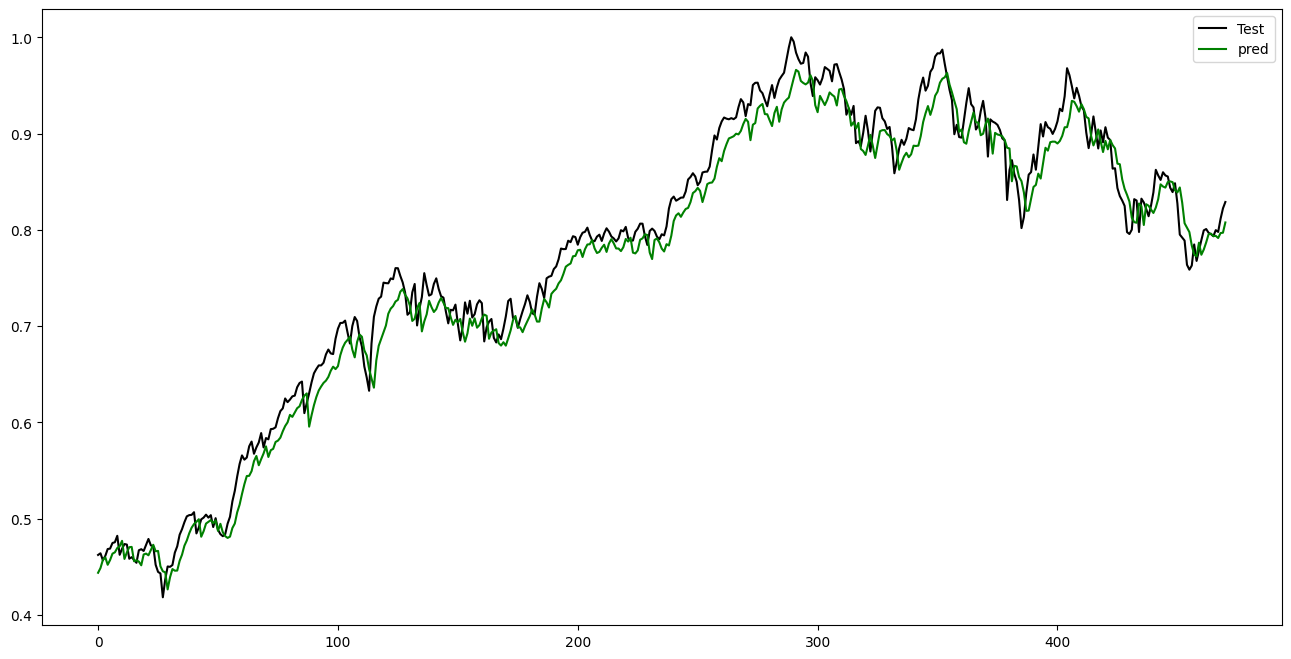

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()